In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense


In [14]:
df=pd.read_csv('bankloan.csv')
df=df.dropna()

mount = df['LoanAmount']
state = df['Loan_Status']

# check nan exists 
df.isna().any()

# exclude no need column
df=df.drop('Loan_ID', axis=1)

mount = (mount * 1000).astype(int)

# 전체 대출건수중 승인된 대출건수 비율체크
# Counter(state)['Y']/state.size
Counter(state)

Counter({'N': 148, 'Y': 332})

In [18]:
pre_y = state
pre_x = df.drop('Loan_Status', axis=1)

# 기계가 이해할 수 있는 수치데이터로 변환 후, 서로간의 관계성 제외를 위해 가변수화 작업을한다
#  get_dummies함수는 위 작접을 둘다 해줌!

dm_x = pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1, N=0))
pre_y.shape
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [28]:
# SMOTE알고리즘은 오버샘플링 기법 중 합성데이터를 생성하는 방식으로 가장 많이 사용되고 있는 모델이다.
# 부트스트래핑이나 KNN(최근접이웃) 모델 기법을 활용한다.

smote = SMOTE(sampling_strategy='auto')
x1, y = smote.fit_resample(dm_x, dm_y)

# 0~1사이의 값으로 변환
sc = MinMaxScaler()
x = sc.fit_transform(x1)

# array to dataframe
# pd.DataFrmae(x, index=index, columns=columns)

# pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.333333,0.054830,0.044567,0.201354,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.035250,0.000000,0.096447,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.030093,0.069687,0.187817,0.729730,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.072356,0.000000,0.223350,0.729730,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.666667,0.065145,0.124006,0.436548,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.666667,0.040866,0.000000,0.210158,0.729730,0.828685,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
660,0.000000,0.018491,0.051400,0.158758,0.776803,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
661,0.411418,0.026073,0.000000,0.141638,0.729730,0.617128,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
662,0.273363,0.037328,0.074300,0.261765,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [41]:
# dm_x.columns
pd.DataFrame(x_test, columns=dm_x.columns)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.056895,0.068948,0.204738,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.242177,0.155628,0.949239,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.666667,0.047458,0.041700,0.250423,0.729730,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.043958,0.059107,0.187817,0.729730,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.049845,0.068150,0.292724,0.729730,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.000000,0.074038,0.131901,0.360246,0.729730,0.263378,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
129,0.043896,0.027520,0.043073,0.159811,0.911022,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
130,1.000000,0.040198,0.073884,0.192893,0.729730,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
131,0.000000,0.051738,0.072435,0.170897,0.729730,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [50]:
# 초기값 설정은 케라스 레이어의 초기 난수 가중치를 설정하는 방식을 규정합니다.
# 비교적 성능이 좋다는 he_normal 가중치를 사용!
# 활성화 함수는 그냥 relu가 나은듯 selu, elu, prelu, lrelu 등이 있는데 각기 상황에 따라
# 성능이 저하 될 수 있으니 그냥 무난한 relu를 사용

classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='he_normal', input_dim=x_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='he_normal'))            
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
classifier.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])               
classifier.fit(x_train,y_train, batch_size=20, epochs=50, verbose=0)
eval_model=classifier.evaluate(x_train, y_train)
eval_model

17/17 [==============================] - 0s 686us/step - loss: 0.1892 - accuracy: 0.9247


[0.18920332193374634, 0.9246704578399658]

In [51]:
y_pred = classifier.predict(x_test)
y_pred = y_pred>0.55

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

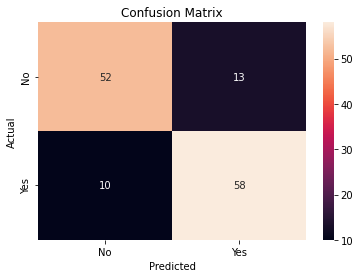

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
